In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.chdir('../../data/')

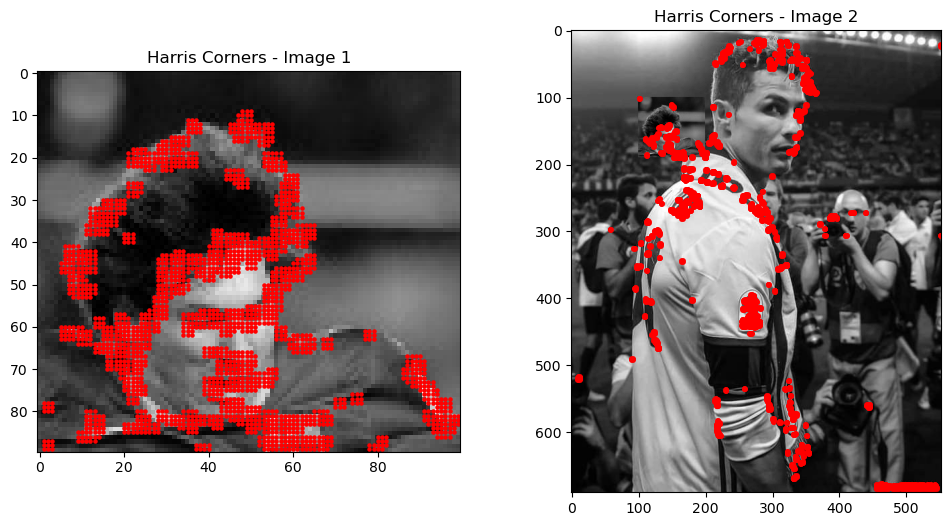

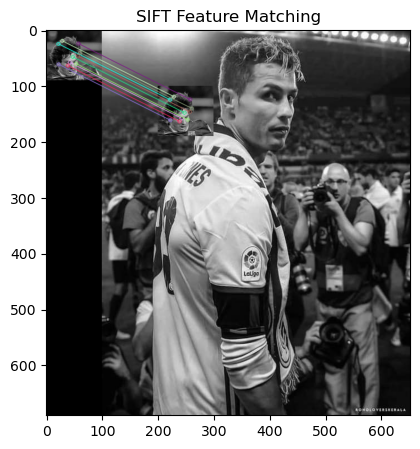

In [3]:
# Load two images for feature matching
img1 = cv2.imread('template.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('IMG.jpg', cv2.IMREAD_GRAYSCALE)

# Harris Corner Detection
def harris_corner_detection(image):
    # Apply Harris Corner detection
    corners = cv2.cornerHarris(image, 2, 3, 0.04)
    corners = cv2.dilate(corners, None)  # Dilate the corners to make them visible
    return corners

# Apply Harris Corner Detection to both images
corners1 = harris_corner_detection(img1)
corners2 = harris_corner_detection(img2)

# Display Harris Corners on images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('Harris Corners - Image 1')
plt.scatter(np.where(corners1 > 0.01 * corners1.max())[1], 
            np.where(corners1 > 0.01 * corners1.max())[0], 
            color='red', s=5)

plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title('Harris Corners - Image 2')
plt.scatter(np.where(corners2 > 0.01 * corners2.max())[1], 
            np.where(corners2 > 0.01 * corners2.max())[0], 
            color='red', s=5)

plt.show()

# SIFT Feature Matching
def sift_matching(img1, img2):
    # Create SIFT detector object
    sift = cv2.SIFT_create()

    # Find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    # Create BFMatcher object (Brute Force Matcher) and match descriptors
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(des1, des2)

    # Sort matches based on their distances
    matches = sorted(matches, key=lambda x: x.distance)

    return kp1, kp2, matches

# Perform SIFT matching
keypoints1, keypoints2, matches = sift_matching(img1, img2)

# Draw matches
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display matches
plt.figure(figsize=(10, 5))
plt.imshow(img_matches)
plt.title('SIFT Feature Matching')
plt.show()
